In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib # For saving the model

In [3]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of features:")
print(X.head())
print("\nUnique target values:", y.unique())
print("Target names:", iris.target_names)

Features (X) shape: (150, 4)
Target (y) shape: (150,)

First 5 rows of features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Unique target values: [0 1 2]
Target names: ['setosa' 'versicolor' 'virginica']


In [4]:
# Split the dataset into training and testing sets
# We'll use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Training set shapes:
X_train: (120, 4)
y_train: (120,)

Testing set shapes:
X_test: (30, 4)
y_test: (30,)


In [5]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200) # Increased max_iter for convergence
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


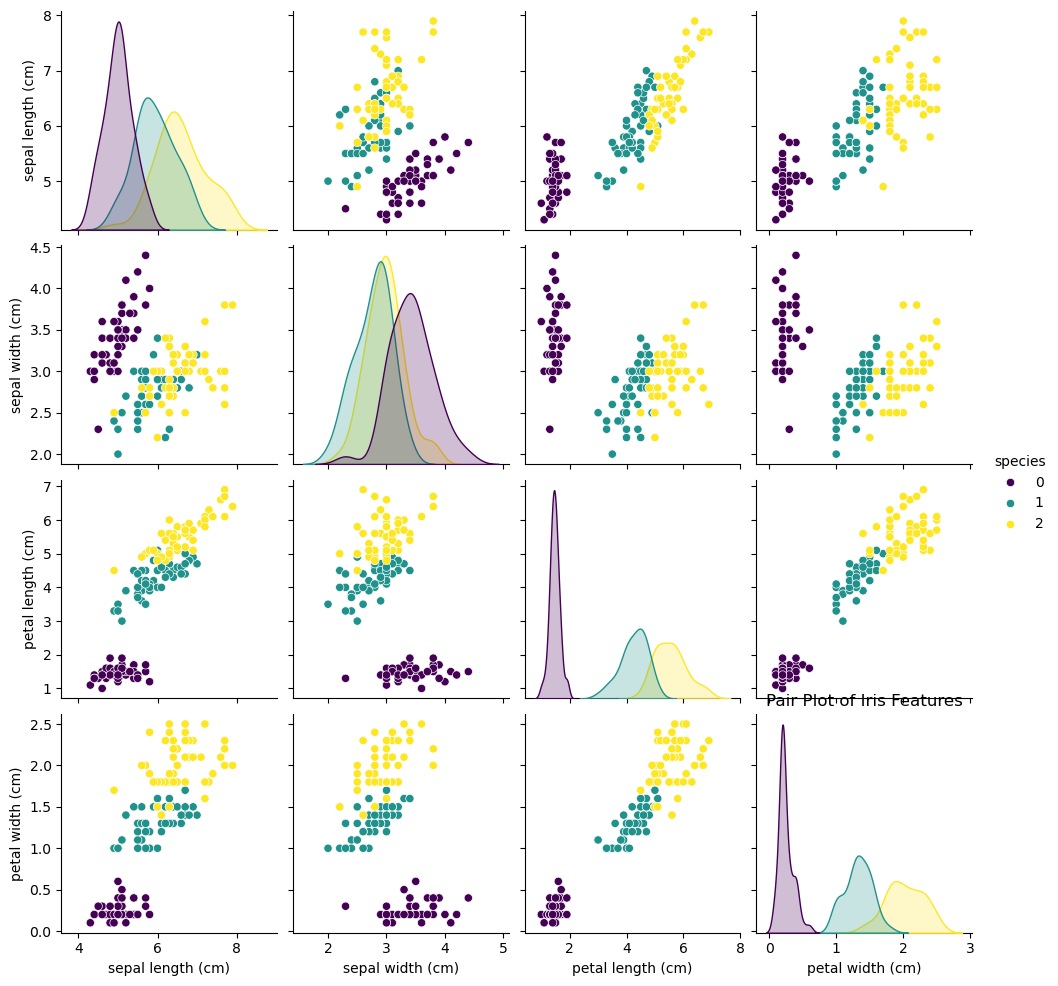

In [5]:
sns.pairplot(X.assign(species=y), hue='species', palette='viridis')
plt.title("Pair Plot of Iris Features")
plt.show()

In [6]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200) # Increased max_iter for convergence
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
# Save the trained model to a file
model_filename = 'iris_logistic_regression_model.joblib'
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to iris_logistic_regression_model.joblib


In [9]:
print("\nModel training complete.")



Model training complete.


In [10]:
y_pred = model.predict(X_test)


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.8889


In [12]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



In [13]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)


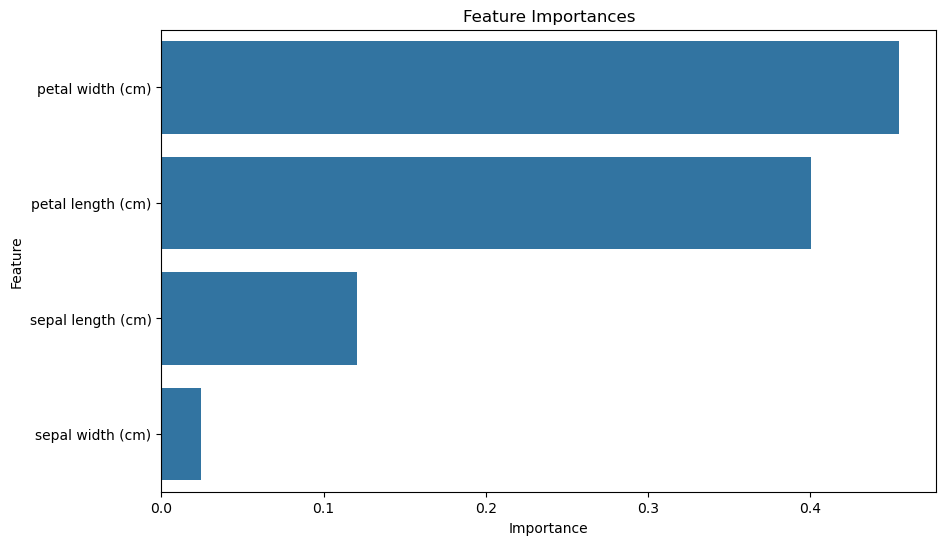

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [15]:
import joblib
joblib.dump(model, 'iris_random_forest_model.pkl')
print("\nModel saved as 'iris_random_forest_model.pkl'")


Model saved as 'iris_random_forest_model.pkl'
